In [1]:
# interpolation frequency

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.interpolate import interp1d
%matplotlib inline

(0.0, 4.99)

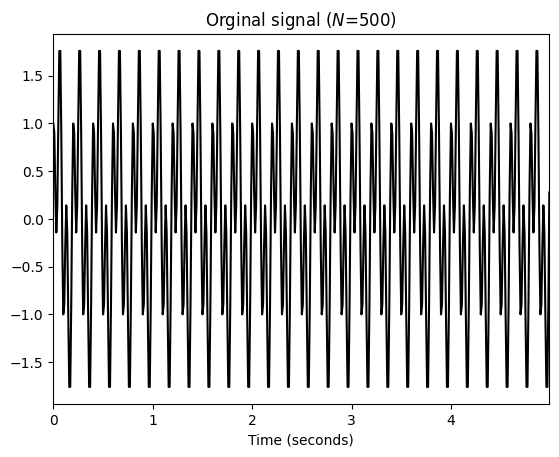

In [2]:
'''original signal '''

fs = 100
duration = 5
omega1 = 5
omega2 = 15
N = int(duration*fs)
t = np.arange(N)/fs
x = np.sin(2*np.pi*omega1*t) + np.cos(2*np.pi*omega2*t)
plt.plot(t, x, c='k')
plt.title('Orginal signal ($N$=%d)' % N)
plt.xlabel('Time (seconds)')
plt.xlim([t[0], t[-1]])

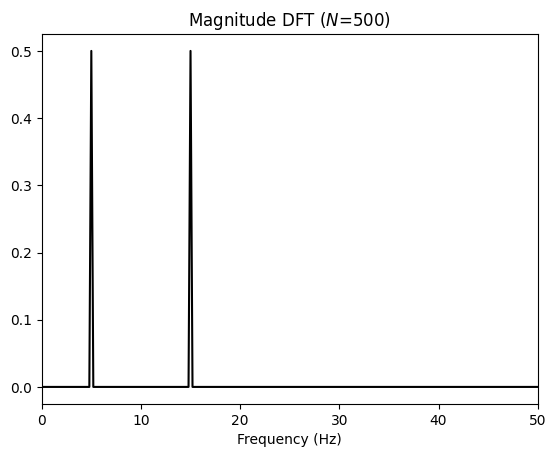

(0.0, 50.0)

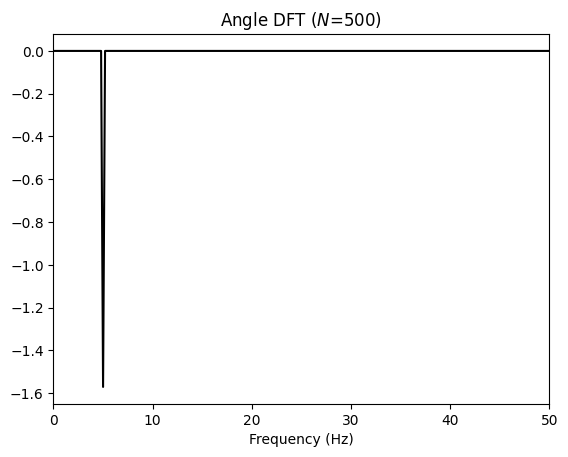

In [3]:
'''original FFT'''

# magnitude part
YFFT = np.fft.fft(x)
YFFT = YFFT / N
Y = np.abs(YFFT)
Y = Y[:N//2+1]
F_coef = np.arange(N//2+1)*fs/N
plt.plot(F_coef,Y, c='k')
plt.title('Magnitude DFT ($N$=%d)' % N)
plt.xlabel('Frequency (Hz)')
plt.xlim([F_coef[0], F_coef[-1]])
plt.show()

# angle part
X2 = YFFT
threshold = np.max(YFFT)/10000;
X2[np.abs(YFFT)<threshold] = 0;
Pz = np.angle(X2)
Pz = Pz[:N//2+1]
F_coef = np.arange(N//2+1)*fs/N
plt.plot(F_coef,Pz, c='k')
plt.title('Angle DFT ($N$=%d)' % N)
plt.xlabel('Frequency (Hz)')
plt.xlim([F_coef[0], F_coef[-1]])

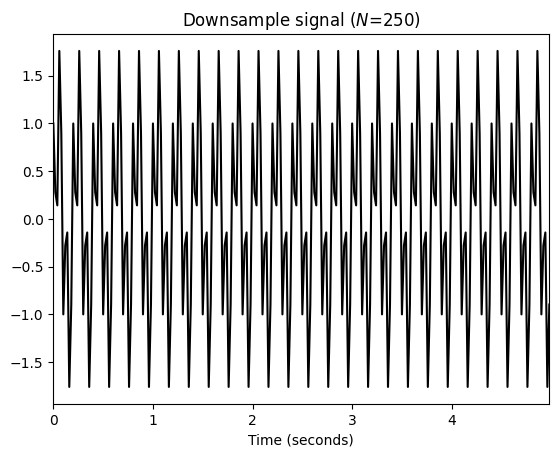

In [4]:
''' downsmaple signal '''

d_f = 0.5  # downsample factor
d_N = int(d_f * N)
d_fs = fs * d_f
d_t = np.arange(d_N)/d_fs
f_interpolate_nearest = interp1d(t, x, kind='nearest', fill_value='extrapolate')
f_interpolate_linear = interp1d(t, x, kind='linear', fill_value='extrapolate')

d_s_nearest = f_interpolate_nearest(d_t)
d_s_linear = f_interpolate_linear(d_t)

plt.plot(d_t, d_s_linear, c='k')
plt.title('Downsample signal ($N$=%d)' % d_N)
plt.xlabel('Time (seconds)')
plt.xlim([d_t[0], d_t[-1]])
plt.show()

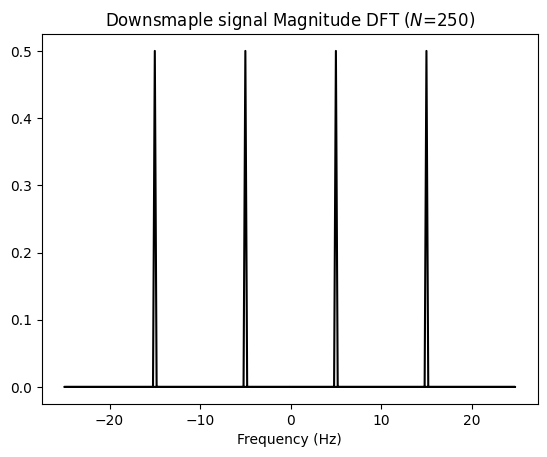

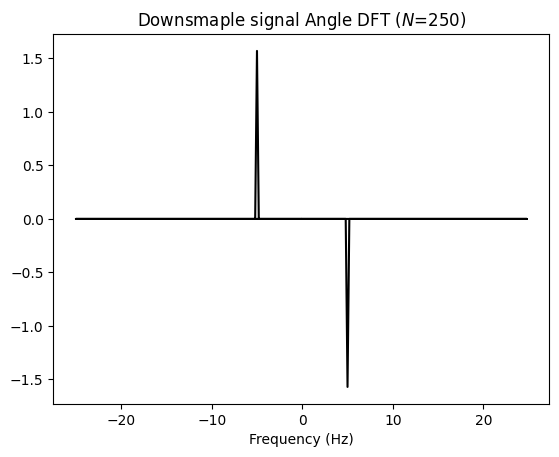

In [5]:
''' downsample FFT '''

# magnitude part
YFFT = np.fft.fft(d_s_linear)
YFFT = YFFT / d_N
d_mag = np.abs(YFFT)
d_F_coef = np.fft.fftfreq(d_N, d=1/d_fs)
plt.plot(d_F_coef,d_mag, c='k')
plt.title('Downsmaple signal Magnitude DFT ($N$=%d)' % d_N)
plt.xlabel('Frequency (Hz)')
#plt.xlim([d_F_coef[0], d_F_coef[-1]])
plt.show()

# angle part
X2 = YFFT
threshold = np.max(YFFT)/10000;
X2[np.abs(YFFT)<threshold] = 0;
d_angle = np.angle(X2)
plt.plot(d_F_coef,d_angle, c='k')
plt.title('Downsmaple signal Angle DFT ($N$=%d)' % d_N)
plt.xlabel('Frequency (Hz)')
#plt.xlim([d_F_coef[0], d_F_coef[-1]])
plt.show()

/home/diego/.local/share/virtualenvs/self_learning-jylihH6I/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


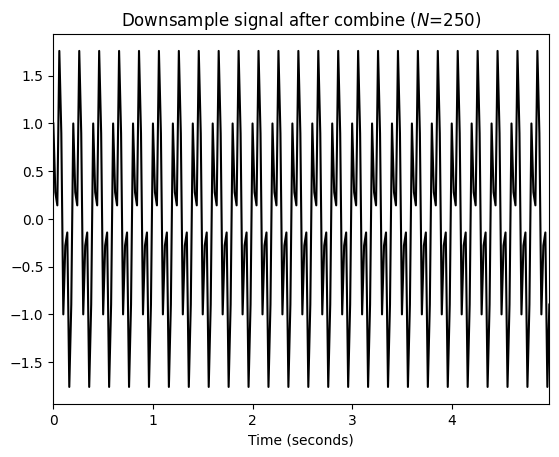

In [6]:
# Eq. FFT signal = mag * exp(1j * phase)
d_s_combine = d_N*d_mag * np.exp(1j * d_angle)
d_s_combine = np.fft.ifft(d_s_combine)
plt.plot(d_t, d_s_combine, c='k')
plt.title('Downsample signal after combine ($N$=%d)' % d_N)
plt.xlabel('Time (seconds)')
plt.xlim([d_t[0], d_t[-1]])
plt.show()

In [7]:
def interpolate_DFT(duration, desired_Fs, F_coef, Y, int_method):
    max_freq = desired_Fs / 2
    half_n_samples = int(duration * desired_Fs / 2)
    first_f_coef = np.linspace(0,max_freq,half_n_samples)
    second_f_coef = np.linspace(-max_freq,0,half_n_samples,endpoint=False)
    F_coef_interpol = np.concatenate((first_f_coef, second_f_coef))
    Y_interpol = interp1d(F_coef, Y, kind=int_method, fill_value=0, bounds_error=False)(F_coef_interpol)
    plt.bar(F_coef_interpol, Y_interpol)
    return  Y_interpol

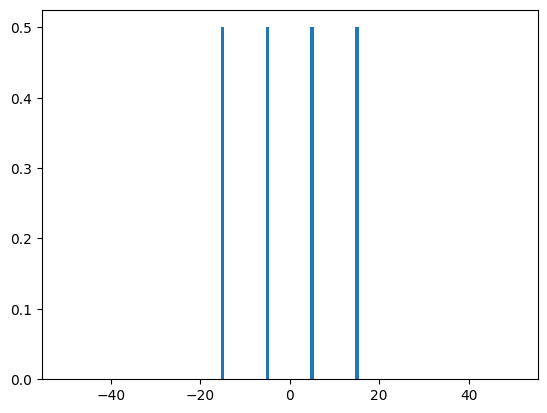

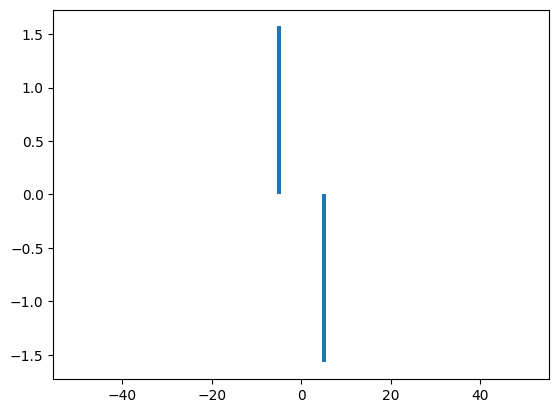

In [8]:
'''upsample FFT'''
desired_Fs = 100
u_mag = interpolate_DFT(duration=duration,desired_Fs=desired_Fs, F_coef=d_F_coef,
                             Y=d_mag, int_method='zero')
plt.figure()
u_angle = interpolate_DFT(duration=duration,desired_Fs=desired_Fs, F_coef=d_F_coef,
                               Y=d_angle, int_method='zero')

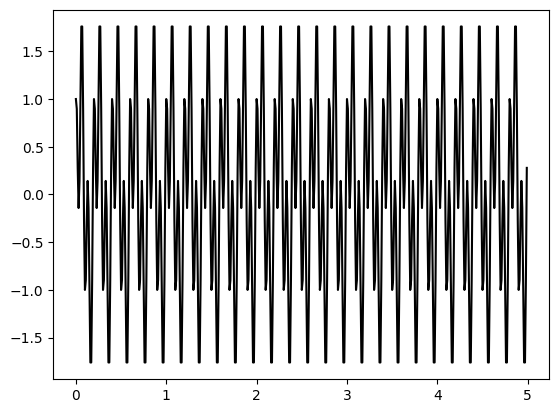

In [9]:
d_s_combine = N * u_mag * np.exp(1j * u_angle)
d_s_combine = np.fft.ifft(d_s_combine)
N = int(duration*desired_Fs)
t = np.arange(N)/desired_Fs
plt.plot(t,d_s_combine, c='k')